# LOAN PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox, boxcox_normmax
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge , Lasso, RidgeCV
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.preprocessing import OneHotEncoder ,RobustScaler
from xgboost import XGBRegressor
import warnings


warnings.filterwarnings("ignore")

In [2]:
# read the data 
train_df=pd.read_csv("./archive/Training Dataset.csv")
test_df=pd.read_csv("./archive/Test Dataset.csv")

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## DATA CLEANING

In [5]:
#dupliced
train_df.duplicated().sum()

0

In [6]:
#missing values
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

EDA

<Axes: ylabel='count'>

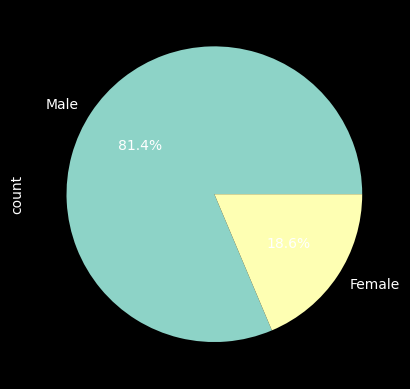

In [7]:
# analysing gender column
train_df['Gender'].value_counts().plot(kind='pie', autopct="%1.1f%%")

In [8]:
# gender vs loan_status
train_df.groupby('Gender')['Loan_Status'].value_counts().plot

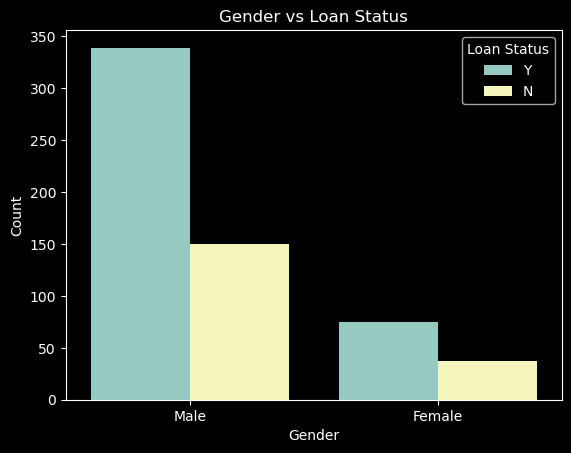

In [9]:
sns.countplot(x='Gender', hue='Loan_Status', data=train_df)

# Customize the plot
plt.title('Gender vs Loan Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [10]:
# percentage of male & female in approved loans
approved_loans = train_df[train_df['Loan_Status']=='Y']
total_approved = len(approved_loans)
total_males = len(train_df[train_df['Gender']=='Male'])
total_females = len(train_df[train_df['Gender']=='Female'])
approved_males = len(approved_loans[approved_loans['Gender']=='Male'])
approved_females = len(approved_loans[approved_loans['Gender']=='Female'])

print(f'Percentage of male with approved loans: {approved_males/total_males}')
print(f'Percentage of female with approved loans: {approved_females/total_females}')
print(f'Male loans approved: {approved_males/total_approved}')
print(f'Female loans approved: {approved_females/total_approved}')

Percentage of male with approved loans: 0.6932515337423313
Percentage of female with approved loans: 0.6696428571428571
Male loans approved: 0.8033175355450237
Female loans approved: 0.17772511848341233


<Axes: ylabel='count'>

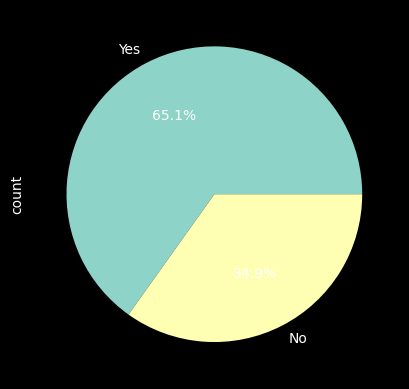

In [11]:
# analysing married column
train_df['Married'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [12]:
# married vs loan_status
train_df.groupby('Married')['Loan_Status'].value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              285
         N              113
Name: count, dtype: int64

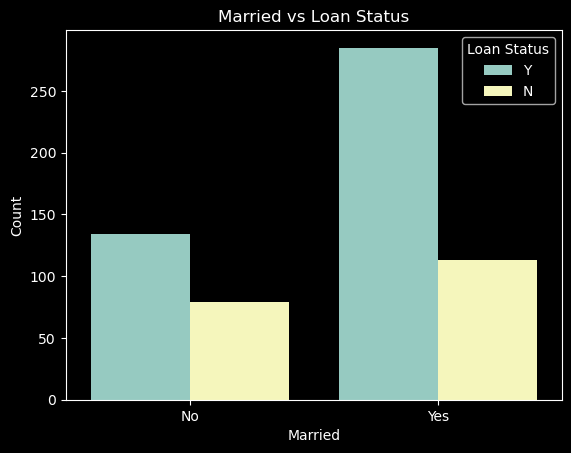

In [13]:
sns.countplot(x='Married', hue='Loan_Status', data=train_df)

# Customize the plot
plt.title('Married vs Loan Status')
plt.xlabel('Married')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [14]:
# Filter the dataframe for approved loans
approved_loans = train_df[train_df['Loan_Status'] == 'Y']

# Calculate the total number of approved loans
total_approved = len(approved_loans)

# Calculate the number of approved loans for married and unmarried applicants
unmarried_approved = approved_loans[approved_loans['Married'] == 'No']
married_approved = approved_loans[approved_loans['Married'] == 'Yes']

# Calculate the percentages
percent_married_approved = (len(married_approved) / total_approved) * 100
percent_unmarried_approved = (len(unmarried_approved) / total_approved) * 100

# Calculate the number of approved loans for married males and females
married_males_approved = len(married_approved[married_approved['Gender'] == 'Male'])
married_females_approved = len(married_approved[married_approved['Gender'] == 'Female'])

# Calculate the total number of approved loans for males and females
approved_males = len(approved_loans[approved_loans['Gender'] == 'Male'])
approved_females = len(approved_loans[approved_loans['Gender'] == 'Female'])

# Calculate the percentages for married males and females
percent_married_males_approved = (married_males_approved / approved_males) * 100
percent_married_females_approved = (married_females_approved / approved_females) * 100

# Print the results
print(f'Percentage of married approved loans: {percent_married_approved:.2f}%')
print(f'Percentage of unmarried approved loans: {percent_unmarried_approved:.2f}%')
print(f'Percentage of married males with approved loans: {percent_married_males_approved:.2f}%')
print(f'Percentage of married females with approved loans: {percent_married_females_approved:.2f}%')


Percentage of married approved loans: 67.54%
Percentage of unmarried approved loans: 31.75%
Percentage of married males with approved loans: 75.52%
Percentage of married females with approved loans: 30.67%


<Axes: ylabel='count'>

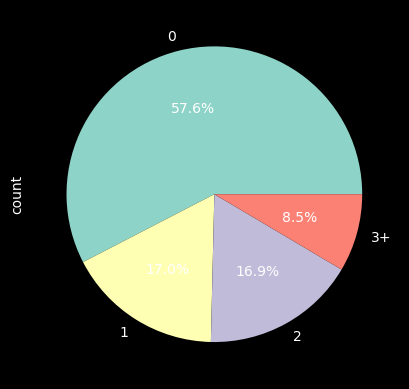

In [15]:
# analysing dependents column
train_df['Dependents'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [16]:
# dependents vs loan_status
# Calculate the counts of loan statuses grouped by dependents
dependents_loan_status_counts = train_df.groupby('Dependents')['Loan_Status'].value_counts()

# Convert the counts to a percentage
dependents_loan_status_percentage = dependents_loan_status_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Display the percentage
print(dependents_loan_status_percentage)

Dependents  Dependents  Loan_Status
0           0           Y              68.985507
                        N              31.014493
1           1           Y              64.705882
                        N              35.294118
2           2           Y              75.247525
                        N              24.752475
3+          3+          Y              64.705882
                        N              35.294118
Name: count, dtype: float64


<Axes: ylabel='count'>

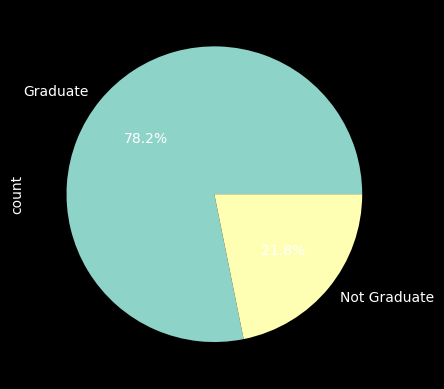

In [17]:
#analysing education column
train_df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [18]:
# education vs loan_status
train_df.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: count, dtype: int64

In [19]:
# Count graduate and non-graduate approved loans
graduate_approved = (approved_loans['Education'] == 'Graduate').sum()
total_graduated = (train_df['Education']=='Graduate').sum()
total_not_graduated = (train_df['Education']=='Not Graduate').sum()
not_graduate_approved = (approved_loans['Education'] == 'Not Graduate').sum()

# Total approved loans
total_approved = len(approved_loans)

# Calculate percentages
print(f'Percentage of graduate loan approved: {graduate_approved / total_approved * 100:.2f}%')
print(f'Percentage of not graduate loan approved: {not_graduate_approved / total_approved * 100:.2f}%')
print(f'Percentage of graduate approval chances: {graduate_approved/total_graduated * 100:.2f}%')
print(f'Percentage of not graduate approval chances: {not_graduate_approved/total_not_graduated * 100:.2f}%')

Percentage of graduate loan approved: 80.57%
Percentage of not graduate loan approved: 19.43%
Percentage of graduate approval chances: 70.83%
Percentage of not graduate approval chances: 61.19%


<Axes: ylabel='count'>

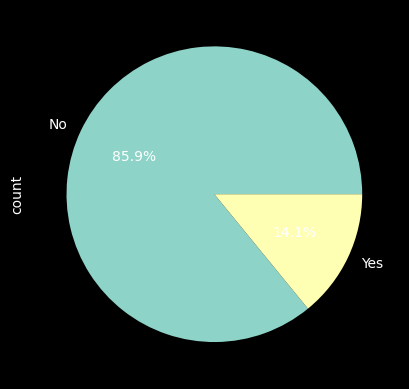

In [20]:
# analysing self employed column
train_df['Self_Employed'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [21]:
# self employed vs loan_status
train_df.groupby('Self_Employed')['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: count, dtype: int64

In [22]:
self_employed_approved = (approved_loans['Self_Employed']=='Yes').sum()
not_self_employed_approved = (approved_loans['Self_Employed']=='No').sum()
self_employed = (train_df['Self_Employed']=='Yes').sum()
not_self_employed = (train_df['Self_Employed']=='No').sum()

print(f'Percentage of self employed approved loans: {self_employed_approved/total_approved*100:.2f}%')
print(f'Percentage of not self employed approved loans: {not_self_employed_approved/total_approved*100:.2f}%')
print(f'Self employed approval chances: {self_employed_approved/self_employed*100:.2f}%')
print(f'Not Self employed approval chances: {not_self_employed_approved/not_self_employed*100:.2f}%')

Percentage of self employed approved loans: 13.27%
Percentage of not self employed approved loans: 81.28%
Self employed approval chances: 68.29%
Not Self employed approval chances: 68.60%


In [23]:
# analysing ApplicantIncome column
train_df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

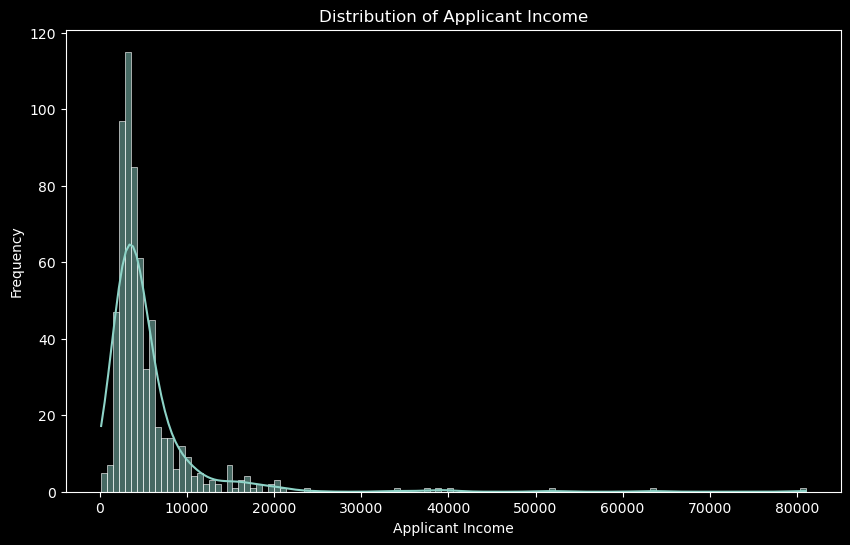

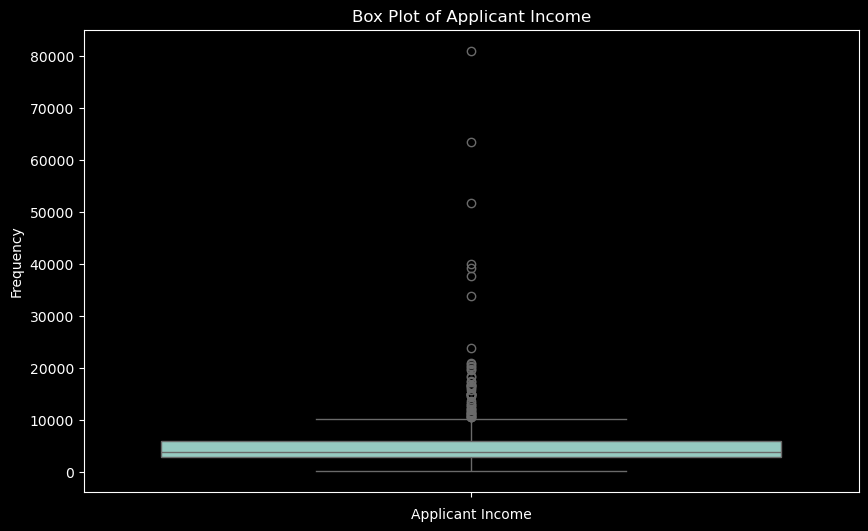

In [24]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(train_df['ApplicantIncome'], kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(train_df['ApplicantIncome'])
plt.title('Box Plot of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

In [25]:
Q1 = train_df['ApplicantIncome'].quantile(0.25)
Q3 = train_df['ApplicantIncome'].quantile(0.75)
IQR = Q1 - Q3

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers
outliers = train_df[(train_df['ApplicantIncome'] < lower_bound) | (train_df['ApplicantIncome'] > upper_bound)]
print(outliers)


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [26]:
# drop loan_id column
train_df.drop('Loan_ID', axis=1, inplace=True)
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
# analysing coapplicant income
train_df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

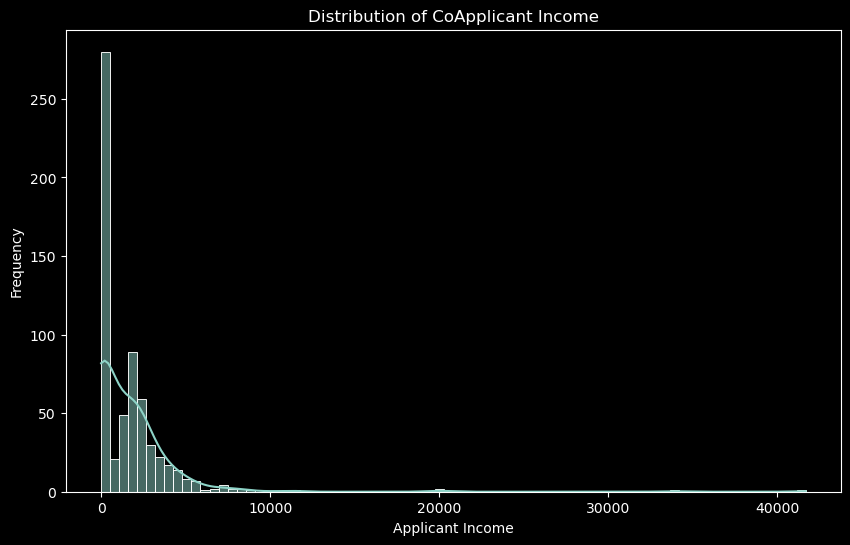

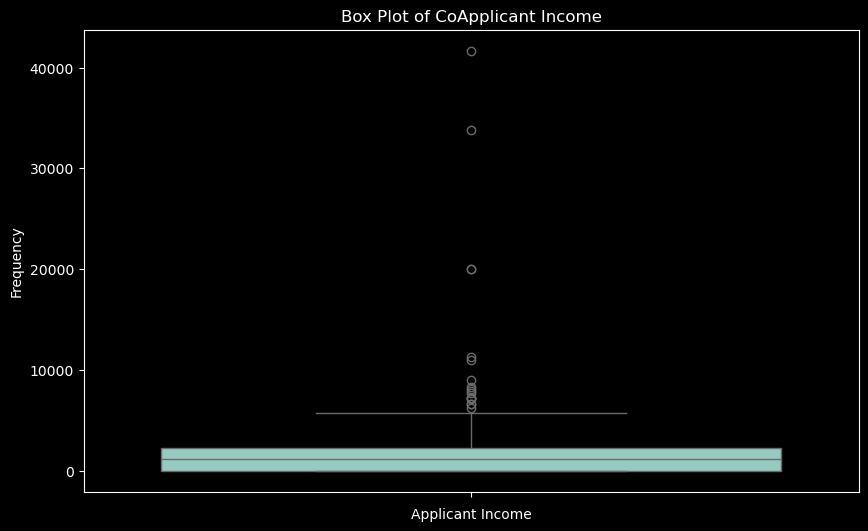

In [28]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(train_df['CoapplicantIncome'], kde=True)
plt.title('Distribution of CoApplicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(train_df['CoapplicantIncome'])
plt.title('Box Plot of CoApplicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

In [29]:
# analysing loan amount
# Fill missing values in LoanAmount with the median value
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)

In [30]:
train_df['LoanAmount'].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

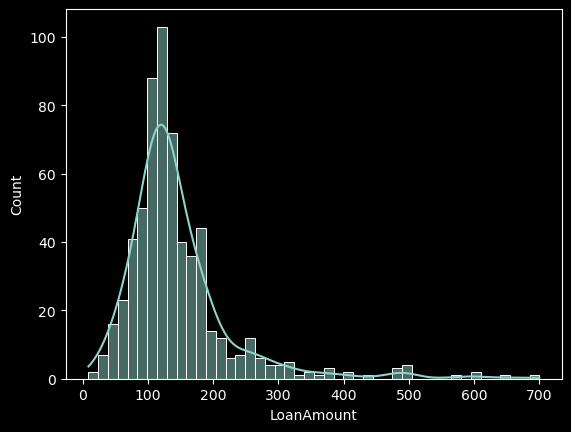

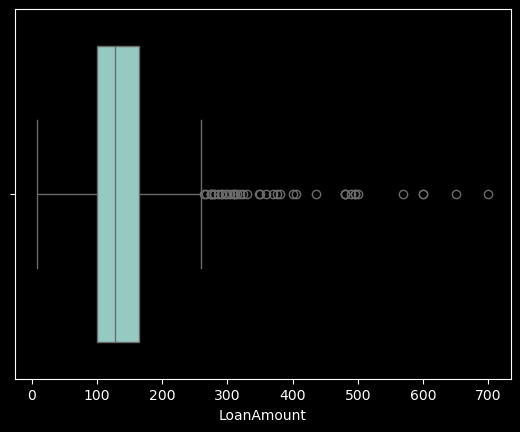

In [31]:
#Histplot of Loan Amount
sns.histplot(x=train_df['LoanAmount'], kde=True)
plt.show()

sns.boxplot(x=train_df['LoanAmount'])
plt.show()

In [32]:
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median(), inplace=True)

In [33]:
train_df['Loan_Amount_Term'].describe()

count    614.000000
mean     342.410423
std       64.428629
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

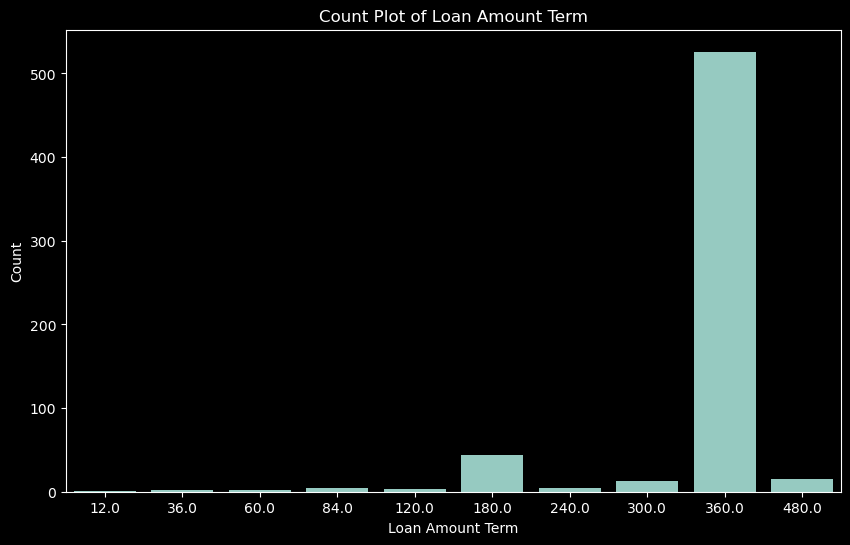

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Amount_Term', data=train_df)
plt.title('Count Plot of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.show()

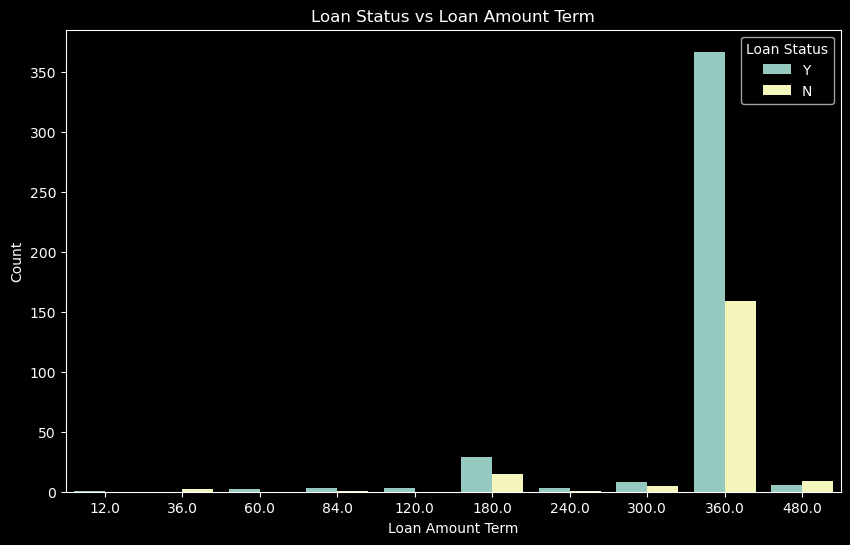

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=train_df)
plt.title('Loan Status vs Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [36]:
train_df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [37]:
train_df['Credit_History'].fillna(1.0, inplace=True)

In [38]:
# credit history vs loan status
train_df.groupby('Credit_History')['Loan_Status'].value_counts()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              415
                N              110
Name: count, dtype: int64

In [39]:
# Filter approved loans
approved_loans = train_df[train_df['Loan_Status'] == 'Y']

# Calculate the counts for Credit_History
credit_history_1 = (train_df['Credit_History'] == 1.0).sum()
credit_history_0 = (train_df['Credit_History'] == 0.0).sum()

# Calculate the counts for approved loans with respective Credit_History
credit_1_approved = (approved_loans['Credit_History'] == 1.0).sum()
credit_0_approved = (approved_loans['Credit_History'] == 0.0).sum()

# Print the chances of loan approval
print(f'Loan approval chances with credit history: {credit_1_approved / credit_history_1 * 100:.2f}%')
print(f'Loan approval chances without credit history: {credit_0_approved / credit_history_0 * 100:.2f}%')

Loan approval chances with credit history: 79.05%
Loan approval chances without credit history: 7.87%


In [40]:
# analysing property area column
train_df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [41]:
train_df.groupby('Property_Area')['Loan_Status'].value_counts()

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: count, dtype: int64

In [42]:
rural = (train_df['Property_Area']=='Rural').sum()
semiurban = (train_df['Property_Area']=='Semiurban').sum()
urban = (train_df['Property_Area']=='Urban').sum()

rural_approved = (approved_loans['Property_Area']=='Rural').sum()
semiurban_approved = (approved_loans['Property_Area']=='Semiurban').sum()
urban_approved = (approved_loans['Property_Area']=='Urban').sum()

print(f'Percentage of rural approved: {rural_approved/rural*100:.2f}%')
print(f'Percentage of semiurban approved: {semiurban_approved/semiurban*100:.2f}%')
print(f'Percentage of rural approved: {urban_approved/urban*100:.2f}%')

Percentage of rural approved: 61.45%
Percentage of semiurban approved: 76.82%
Percentage of rural approved: 65.84%


In [43]:
# correlation matrix
# Selecting numeric columns for correlation calculation
from sklearn.preprocessing import LabelEncoder
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Label encoding for non-numeric columns
label_encoder = LabelEncoder()
for column in train_df.columns:
    if train_df[column].dtype == 'object':
        train_df[column] = label_encoder.fit_transform(train_df[column].astype(str))

# Display encoded DataFrame
print("\nEncoded DataFrame:")
print(train_df.head())


Encoded DataFrame:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  


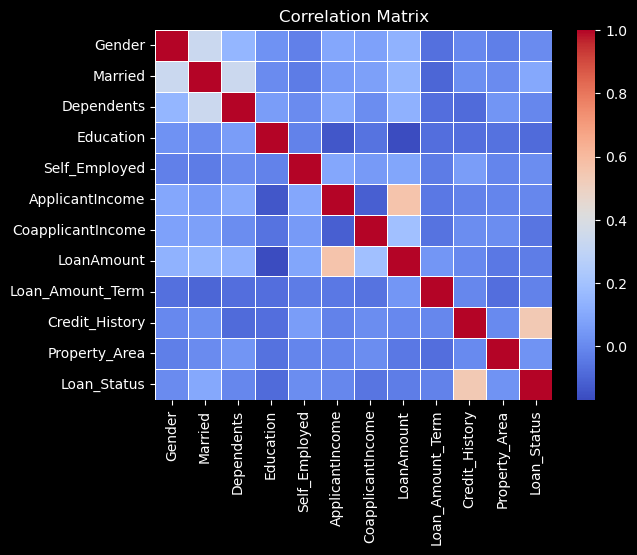

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [44]:
corr_mat = train_df.corr()
sns.heatmap(corr_mat, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
plt.figure(figsize=(10,8))

Modelling

In [45]:
X = train_df.drop('Loan_Status', axis=1)
y = train_df['Loan_Status']

In [46]:
# splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# do scaling of numerical data

In [48]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

rfc_ypred = rfc_model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest Evaluation
print("\nRandom Forest Classifier:")
print(f'Accuracy: {accuracy_score(y_test, rfc_ypred)}')
print("Classification Report:")
print(classification_report(y_test, rfc_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rfc_ypred))


Random Forest Classifier:
Accuracy: 0.7642276422764228
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123

Confusion Matrix:
[[18 25]
 [ 4 76]]


In [50]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
lg_ypred = lg_model.predict(X_test)

In [51]:
# Logistic Regression Evaluation
print("Logistic Regression:")
print(f'Accuracy: {accuracy_score(y_test, lg_ypred)}')
print("Classification Report:")
print(classification_report(y_test, lg_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lg_ypred))

Logistic Regression:
Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
[[18 25]
 [ 1 79]]


In [52]:
# using xgboost
!pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_ypred = xgb_model.predict(X_test)

In [53]:
# Xgboost Evaluation
print("xgboost:")
print(f'Accuracy: {accuracy_score(y_test, xgb_ypred)}')
print("Classification Report:")
print(classification_report(y_test, xgb_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_ypred))

xgboost:
Accuracy: 0.7560975609756098
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.49      0.58        43
           1       0.77      0.90      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.69      0.71       123
weighted avg       0.75      0.76      0.74       123

Confusion Matrix:
[[21 22]
 [ 8 72]]


In [54]:
from sklearn.preprocessing import StandardScaler

# Scale/normalize the data
scaler = StandardScaler()
train_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(
    train_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
)
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,2,1


In [55]:
# now apply all the modelling after scaling
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

rfc_ypred = rfc_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest Evaluation
print("\nRandom Forest Classifier:")
print(f'Accuracy: {accuracy_score(y_test, rfc_ypred)}')
print("Classification Report:")
print(classification_report(y_test, rfc_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rfc_ypred))

# logistic regression
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
lg_ypred = lg_model.predict(X_test)

# Logistic Regression Evaluation
print("Logistic Regression:")
print(f'Accuracy: {accuracy_score(y_test, lg_ypred)}')
print("Classification Report:")
print(classification_report(y_test, lg_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lg_ypred))

# using xgboost
!pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_ypred = xgb_model.predict(X_test)

# Xgboost Evaluation
print("xgboost:")
print(f'Accuracy: {accuracy_score(y_test, xgb_ypred)}')
print("Classification Report:")
print(classification_report(y_test, xgb_ypred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_ypred))


Random Forest Classifier:
Accuracy: 0.7723577235772358
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

Confusion Matrix:
[[18 25]
 [ 3 77]]
Logistic Regression:
Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
[[18 25]
 [ 1 79]]
xgboost:
Accuracy: 0.7560975609756098
Classification Report:
              precision    recall  f1-score   support

    

In [56]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print(f"Best Parameters: {grid_search_rf.best_params_}")
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\nTuned Random Forest Classifier:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_best_rf)}')
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Tuned Random Forest Classifier:
Accuracy: 0.7804878048780488
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Confusion Matrix:
[[18 25]
 [ 2 78]]


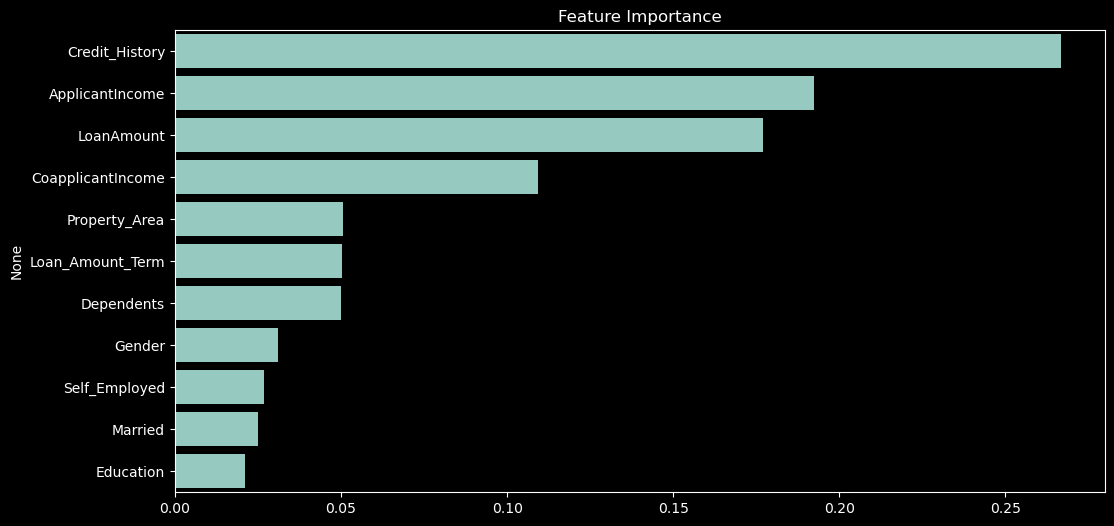

In [57]:
# Feature importance for Random Forest
importances = rfc_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance")
plt.show()

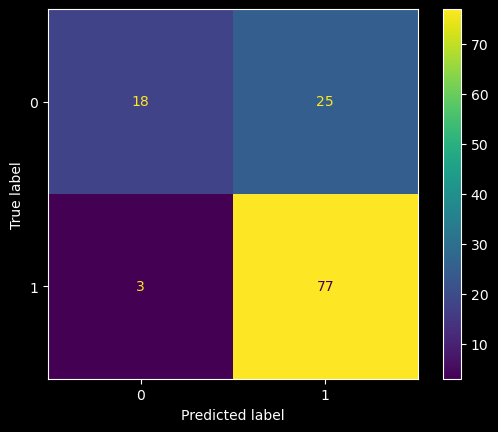

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rfc_model,X_test,y_test)

In [59]:
# test_data = pd.read_csv('/kaggle/input/loan-approval-prediction/Test Dataset.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [60]:
# Preprocess the test data similar to the training data
test_df['Dependents'].replace('3+', 3, inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].median(), inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].median(), inplace=True)

# Encode categorical variables
test_df = pd.get_dummies(test_df)

# Ensure the same order of columns as the training data
missing_cols = set(X.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[X.columns]

In [61]:
# Scale the test data
test_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.transform(
    test_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
)

In [62]:
# Make predictions
test_predictions = best_rf.predict(test_df)

test = pd.read_csv('./archive/Test Dataset.csv')

# Prepare the submission file
submission = pd.DataFrame({
    'Loan_ID': test['Loan_ID'],
    'Loan_Status': test_predictions
})

# Convert numerical predictions to categorical ('Y' or 'N')
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

# Save the submission file
submission.to_csv('./archive/submission.csv', index=False)

# Display the submission file
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [63]:
print(test.shape)
print(submission.shape)

(367, 12)
(367, 2)
